# NTDS demo 5: Plotting with Matplotlib
[Effrosyni Simou](http://lts4.epfl.ch/simou), *PhD Student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

## Ojective
In this lab session we will provide a short tutorial to ``Matplotlib``. We will present:

1) The ``matplotlib.pyplot`` module that provides a procedural interface similar to that of Matlab

2) The Object Oriented API of Matplotlib, which allows for maximum flexibility 

## Resources

Here are some links that you may find useful if you want to learn more about ``Matplotlib``, than what is included in this demo:

* [Matplotlib Documentation](https://matplotlib.org/index.html)
* [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

## 1. The Pyplot API

In [1]:
%matplotlib inline
# magic command that sets the backend of matplotlib to the 'inline' backend 

import numpy as np
from scipy import sparse
import IPython.display as ipd
import matplotlib.pyplot as plt

### Example 1.1: Plot a linear function

Plot $y=x+1$, add labels to the axes and give your plot a title.

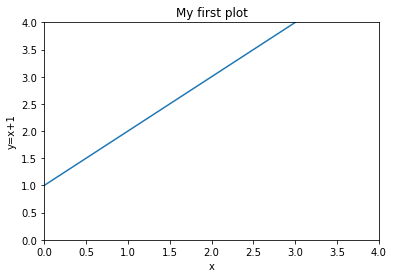

In [2]:
plt.plot([1,2,3,4])
plt.xlabel('x')
plt.ylabel('y=x+1')
plt.axis([0, 4, 0, 4]);
plt.title('My first plot');

### Example 1.2: Plot the sparsity pattern of a 2-D array.

Create and plot an adjacency matrix for a graph with 10 nodes.

In [3]:
row_ind = np.array([1, 3, 9, 7, 6, 9 ,2, 5, 8, 3, 7, 8])
col_ind = np.array([2, 5, 8, 3, 7, 8, 1, 3, 9, 7, 6, 9])
data = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
W = sparse.csr_matrix((data,(row_ind, col_ind)),shape=(10, 10)).toarray()
#np.nonzero(W-W.transpose())

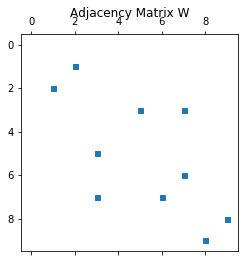

In [4]:
plt.spy(W,markersize=5);
plt.title('Adjacency Matrix W');

### Example 1.3: Plot a histogram

Find the degree of the nodes of the graph that you created in Example 1.2 and plot the degree histogram.

In [5]:
d = W.sum(axis=0)

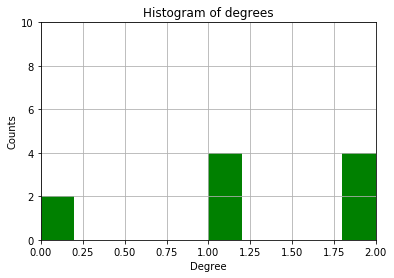

In [6]:
n, bins, patches = plt.hist(d, 10, facecolor='g');
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Histogram of degrees')
plt.axis([0, 2, 0, 10])
plt.grid(True)

### What else can you plot with Pyplot?
You can find a full list of all the functions provided by ``Pyplot`` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

So far we have created simple plots, like the ones you had to create for your first two assignments, using the ``Pyplot`` API. ``Pyplot`` provides a procedural interface similar to the one that you might have been used to from Matlab. However, the Object Oriented API of ``Matplotlib`` offers greater control and customization of the plots and therefore it is recommended to new ``Matplotlib`` users to learn how to use it. 

## 2. The Object Oriented API

Let's have a closer look at what happened when we called the ``pyplot.plot()`` before. Actually, two things happened in the background:

1) We created a figure instance describing the plot window and all of its properties.

2) We added an axes element within the figure. The axes element allows for the data to be arranged in x and y coordinates and provides a wide range of functions. The axes class will be your "best friend" for creating plots with the OO API and you can find out more about it [here](https://matplotlib.org/api/axes_api.html).

In order to fully understand ``Matplotlib`` you should have a look at [this tutorial](https://matplotlib.org/users/artists.html) in order to learn about the underlying concepts of ``Artist``, ``FigureCanvas`` and ``Renderer``.

However, the basics in order to get you started are:
* The ``FigureCanvas`` is where your ``Figure`` will be drawn. When you use ``Pyplot`` to create a ``Figure`` instance, the ``FigureCanvas`` instance is created for you; you do not have to specify anything explicitly. In any other case you have to specify the ``FigureCanvas``. This will also be the case when you want your ``Figure`` to appear in a Graphical User Interface (GUI).
* The ``Figure`` will be the final "picture". A ``Figure`` may contain one or more plots. The ``Axes`` represents each individual plot.

### Example 2.1: Using the agg backend.

In [7]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
# create a Figure instance
fig = Figure()   
# Instanciate the FigureCanvas with the figure as argument
FigureCanvas(fig)
#print(type(fig.canvas))
ax = fig.add_subplot(111)
ax.plot([1, 2, 3],[1, 2, 3])
ax.set_title('My first title')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y=x')
fig.savefig('test')

Open the file `test.png` to see the plot that you created.

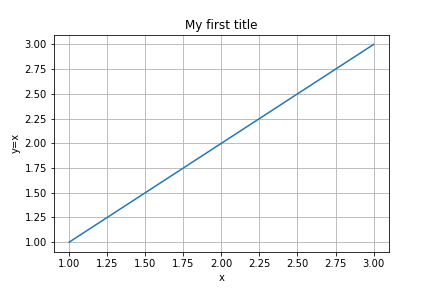

In [8]:
ipd.Image(filename='test.png') 

Now, change the title in your created plot as follows:

In [9]:
ax.set_title('My new title')
fig.savefig('test')

Open again the file test.png. You will see that the title has been changed. 

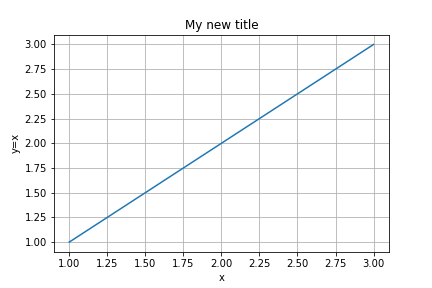

In [10]:
ipd.Image(filename='test.png') 

### Example 2.2: Use Pyplot only to create the figure and show calls

In [11]:
%matplotlib notebook
#activate the nbagg backend, which enables interactivity within the Jupyter Notebook

A commonly used practice for production quality scripts is to use the ``matplotlib.pyplot`` just to create the figure and show calls, and use the OO API for everything else. There are two ways to do that:

#### A: Create a figure using pyplot and create an axes instance on the figure with ``gca``

In [ ]:
fig1 = plt.figure()
# Get the current axes instance on the current figure
ax1 = fig1.gca()
print(type(fig1.canvas))

#### B: Create a figure using pyplot and add an axes instance on the figure with ``add_subplot``

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
print(type(fig2.canvas))

Now that you have created your figures you can plot on them using the ``Axes`` class. Here, as an example, we will plot a scatter plot in ``fig1`` and a cool optical illusion created by [Jake VanderPlas](https://staff.washington.edu/jakevdp/) (the author of the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook )) in ``fig2``. If you are interested you can find more optical illusions created with ``Matplotlib`` by Jake VanderPlas [here](http://nbviewer.jupyter.org/gist/jakevdp/514bcc09637ac71ca1a8fa703c54e5f7).

In [ ]:
#scatterplot
a = np.random.randint(1, 100, size=10)
b = np.random.randint(1, 100, size=10)
ax1.scatter(a, b, color ='red', edgecolors='black')
ax1.set_xscale("linear")
ax1.set_yscale("linear") #change to "log" and see what happens
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.set_title('My first scatterplot')
plt.show(fig1)

In [ ]:
#optical illusion by Jake VanderPlas
from matplotlib.collections import PatchCollection

squares = [plt.Rectangle((i + 0.2 * (j % 3), j), 1, 1)
           for j in range(10) for i in range(0, 15, 2)]

ax2.add_collection(PatchCollection(squares, color='black'))

ax2.hlines(np.arange(11), 0, 16, color='gray')

ax2.axis('equal')
ax2.axis('off');

With ``axes.clear()`` you will clear the content of the figures ``fig1`` and ``fig2``.

In [ ]:
ax1.clear();
ax2.clear();

Now, you can spend some time to create you own plots with `Matplotlib`. Have fun!

In [ ]:
#your code here